In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad

import astropy.units as au
import astropy.coordinates as ac

from numpy import pi,log

# Uncontracted
M_200=0.82e12 #M_sun
R_200=207 #kpc
c=13.31 # concentration parameter (dimensionless)
Npoints=100

# Contracted
M_200=0.97e12 #M_sun
R_200=218 #kpc
c=9.4 # concentration parameter (dimensionless)
R_s=R_200/c

Npoints=100




Text(0, 0.5, '$r^2\\rho_{DM}$, $M_\\odot$/kpc')

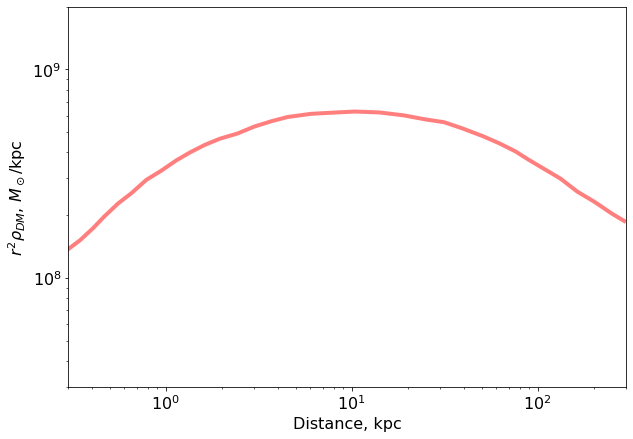

In [60]:
d=np.genfromtxt('DM_profile_contracted.csv')
rr=d[:,0]
rrho=d[:,1]/rr**2

plt.figure(figsize=(10,7))
plt.plot(rr,rrho*rr**2,color='red',linewidth=4,alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.ylim(3e7,2e9)
plt.xlim(0.3,300)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Distance, kpc',fontsize=16)
plt.ylabel(r'$r^2\rho_{DM}$, $M_\odot$/kpc',fontsize=16)



We will use the Milky Way DM density profile derived by Cautun et al. (2019) https://arxiv.org/pdf/1911.04557.pdf . The DM density profile is NFW (Eq. 7):
$$
\rho(r)=\frac{\rho_0 R_s^3}{(r+R_s)^2}=\frac{M_{200}}{4\pi R_{200}^3}\frac{c^3}{\ln(1+c)-c/(1+c)}\frac{R_s^3}{r(r+R_{200}/c)^2}
$$
Next cell is comparison of the DMO profile with parameters from the paper with that reported in Fig. 7


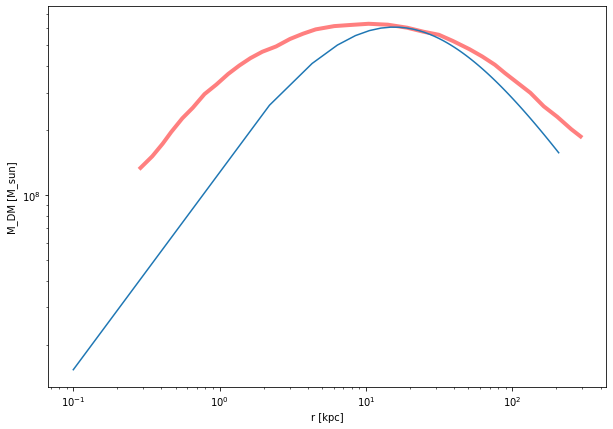

In [62]:
# Uncontracted
M_200=0.82e12 #M_sun
R_200=207 #kpc
c=13.31 # concentration parameter (dimensionless)
R_s=R_200/c



r=np.linspace(0.1,R_200,Npoints)
dr=r[1]-r[0]


# NFW profile
def rho(cc,x):
    rho_r=M_200/(4*pi*R_200**3)*c**3*R_s**3/(log(1+cc)-c/(1+cc))/(x*(x+R_200/cc)**2)
    return rho_r


rho_r=rho(c,r)

plt.figure(figsize=(10,7))
plt.plot(rr,rrho*rr**2,color='red',linewidth=4,alpha=0.5)

plt.plot(r,rho_r*r**2) 
plt.xlabel('r [kpc]')
plt.ylabel('M_DM [M_sun]')
plt.xscale('log')
plt.yscale('log')


In [63]:
rho0=0.3 # GeV/cm3
r0=20    # kpc

def rho_dm(d):
    return rho0/(d/r0)/(1+(d/r0)**2)

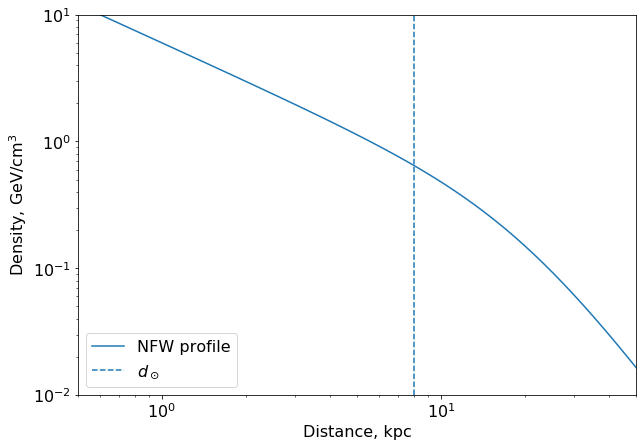

In [64]:
plt.figure(figsize=(10,7))

r=np.logspace(-1,2.5,100) # distance from the MW center in kiloparsec
plt.plot(r,rho_dm(r),label='NFW profile')

plt.axvline(8,linestyle='dashed',label='$d_\odot$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5,50)
plt.ylim(0.01,10)
plt.xlabel('Distance, kpc',fontsize=16)
plt.ylabel('Density, GeV/cm$^3$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='lower left',fontsize=16)


plt.savefig('NFW_profile.png',format='png',dpi=100)
